# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
#from api_keys import weather_api_key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [3]:
# check to see what's in cities list
cities

['mitsamiouli',
 'amderma',
 'vila velha',
 'chisec',
 'puerto ayora',
 'kavieng',
 'hofn',
 'taolanaro',
 'fortuna',
 'castro',
 'chokurdakh',
 'yagodnoye',
 'bluff',
 'samalaeulu',
 'faya',
 'formosa',
 'los llanos de aridane',
 'naugarzan',
 'belushya guba',
 'ushuaia',
 'rikitea',
 'saskylakh',
 'new norfolk',
 'victoria',
 'krasnogorskiy',
 'georgetown',
 'isangel',
 'chuy',
 'cape town',
 'kodiak',
 'bambous virieux',
 'grand river south east',
 'novaya igirma',
 'port alfred',
 'punta arenas',
 'qaanaaq',
 'yinchuan',
 'viedma',
 'iberia',
 'fairbanks',
 'binzhou',
 'ponta do sol',
 'uvat',
 'solwezi',
 'mataura',
 'attawapiskat',
 'tuktoyaktuk',
 'kropotkin',
 'busselton',
 'mar del plata',
 'gaillac',
 'thompson',
 'vila',
 'huitziltepec',
 'the valley',
 'pangai',
 'yellowknife',
 'varzelandia',
 'vaini',
 'cayenne',
 'albany',
 'luderitz',
 'roma',
 'sentyabrskiy',
 'sarai alamgir',
 'avarua',
 'ponta delgada',
 'san quintin',
 'saint george',
 'hami',
 'korgen',
 'bethel',


In [4]:
# run json request for one city as test

url = "http://api.openweathermap.org/data/2.5/weather?"
city_test = "mitsamiouli"
units = "imperial"

# Build query URL
query_url = f"{url}q={city_test}&appid={api_key}&units={units}"

res1 = requests.get(query_url)
res1_json = res1.json()

# Get the temperature from the response
print(f"The weather API responded with: {res1}.")

The weather API responded with: <Response [200]>.


In [6]:
# retrieve and pretty print json response

pprint(res1_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.918, 'lon': 25.5701},
 'dt': 1612242716,
 'id': 964420,
 'main': {'feels_like': 59.43,
          'humidity': 68,
          'pressure': 1021,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Port Elizabeth',
 'sys': {'country': 'ZA',
         'id': 1973,
         'sunrise': 1612237221,
         'sunset': 1612286547,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 14.97}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# make lists to hold data for for loop. use try and except for errors in for loop.
# add counters for Records and Sets retrieved.

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_name = []
lat_coord = []
lng_coord = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

header = "Beginning Data Retrieval\n-----------------------------"
footer = "-----------------------------\nData Retrieval Complete\n-----------------------------"
record_count = 0
set_count = 0

print(header)
for city in cities:
    
    query_url = f"{url}q={city}&appid={api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        city_name.append(response['name'].title())
        lat_coord.append(response['coord']['lat'])
        lng_coord.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print("City not found. Skipping...")
    
    if record_count == 0:
        set_count += 1  
    
    if record_count >= 50:
        set_count += 1
        record_count = 0

    record_count += 1
    print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
    
print(footer)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Mitsamiouli
City not found. Skipping...
Processing Record 2 of Set 1 | Amderma
Processing Record 3 of Set 1 | Vila Velha
Processing Record 4 of Set 1 | Chisec
Processing Record 5 of Set 1 | Puerto Ayora
Processing Record 6 of Set 1 | Kavieng
Processing Record 7 of Set 1 | Hofn
City not found. Skipping...
Processing Record 8 of Set 1 | Taolanaro
Processing Record 9 of Set 1 | Fortuna
Processing Record 10 of Set 1 | Castro
Processing Record 11 of Set 1 | Chokurdakh
Processing Record 12 of Set 1 | Yagodnoye
Processing Record 13 of Set 1 | Bluff
City not found. Skipping...
Processing Record 14 of Set 1 | Samalaeulu
Processing Record 15 of Set 1 | Faya
Processing Record 16 of Set 1 | Formosa
Processing Record 17 of Set 1 | Los Llanos De Aridane
City not found. Skipping...
Processing Record 18 of Set 1 | Naugarzan
City not found. Skipping...
Processing Record 19 of Set 1 | Belushya Guba
Processing Record 20

Processing Record 37 of Set 4 | Puerto Leguizamo
Processing Record 38 of Set 4 | Thunder Bay
Processing Record 39 of Set 4 | Bandarbeyla
Processing Record 40 of Set 4 | Kahului
Processing Record 41 of Set 4 | Haines Junction
Processing Record 42 of Set 4 | Igarapava
Processing Record 43 of Set 4 | Kautokeino
Processing Record 44 of Set 4 | Saldanha
Processing Record 45 of Set 4 | Ribeira Grande
Processing Record 46 of Set 4 | Jalu
Processing Record 47 of Set 4 | Mount Gambier
Processing Record 48 of Set 4 | Kalabagh
Processing Record 49 of Set 4 | Half Moon Bay
Processing Record 50 of Set 4 | Fukue
Processing Record 1 of Set 5 | Paine
Processing Record 2 of Set 5 | San Ramon
Processing Record 3 of Set 5 | Tiksi
Processing Record 4 of Set 5 | Karpathos
Processing Record 5 of Set 5 | Suntar
Processing Record 6 of Set 5 | Edd
Processing Record 7 of Set 5 | Avera
Processing Record 8 of Set 5 | Yatou
Processing Record 9 of Set 5 | San Diego
Processing Record 10 of Set 5 | Broken Hill
Proces

Processing Record 25 of Set 8 | Lasa
Processing Record 26 of Set 8 | Cockburn Town
Processing Record 27 of Set 8 | Kuah
Processing Record 28 of Set 8 | Bereda
Processing Record 29 of Set 8 | Pontianak
Processing Record 30 of Set 8 | Muros
Processing Record 31 of Set 8 | Darab
Processing Record 32 of Set 8 | Rapu-Rapu
Processing Record 33 of Set 8 | Two Hills
Processing Record 34 of Set 8 | Vila Franca Do Campo
Processing Record 35 of Set 8 | Deputatskiy
Processing Record 36 of Set 8 | Loknya
Processing Record 37 of Set 8 | Concarneau
Processing Record 38 of Set 8 | Aldergrove
Processing Record 39 of Set 8 | Gizo
Processing Record 40 of Set 8 | Talnakh
Processing Record 41 of Set 8 | Redcliffe
Processing Record 42 of Set 8 | Colonia
Processing Record 43 of Set 8 | Kidodi
City not found. Skipping...
Processing Record 44 of Set 8 | Menidion
Processing Record 45 of Set 8 | Kruisfontein
Processing Record 46 of Set 8 | Hameenlinna
Processing Record 47 of Set 8 | Rio Tuba
Processing Record 48

Processing Record 15 of Set 12 | Aksarka
Processing Record 16 of Set 12 | Bahia Blanca
Processing Record 17 of Set 12 | Ambilobe
Processing Record 18 of Set 12 | Bukama
Processing Record 19 of Set 12 | Sisimiut
City not found. Skipping...
Processing Record 20 of Set 12 | Mys Shmidta
Processing Record 21 of Set 12 | Coos Bay
Processing Record 22 of Set 12 | Ahipara
Processing Record 23 of Set 12 | Antofagasta
City not found. Skipping...
Processing Record 24 of Set 12 | Temaraia
Processing Record 25 of Set 12 | Honningsvag
Processing Record 26 of Set 12 | Mopti
Processing Record 27 of Set 12 | Tual
Processing Record 28 of Set 12 | Mian Channun
Processing Record 29 of Set 12 | Chumikan
Processing Record 30 of Set 12 | Nara
Processing Record 31 of Set 12 | Placido De Castro
Processing Record 32 of Set 12 | Ejura
Processing Record 33 of Set 12 | Lagdo
Processing Record 34 of Set 12 | Russell
Processing Record 35 of Set 12 | Lagoa
Processing Record 36 of Set 12 | Gallup
Processing Record 37 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# display data in a dataframe and export to CSV 

city_data = {
    "City": city_name,
    "Lat": lat_coord,
    "Lng": lng_coord,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_df = pd.DataFrame(city_data)

city_df.to_csv(output_data_file)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mitsamiouli,-11.3847,43.2844,83.50,66,41,2.89,KM,1612465417
1,Vila Velha,-20.3297,-40.2925,86.00,62,40,18.41,BR,1612465282
2,Chisec,15.8167,-90.2833,75.20,46,0,6.91,GT,1612465219
3,Puerto Ayora,-0.7393,-90.3518,86.00,62,0,5.75,EC,1612465425
4,Kavieng,-2.5744,150.7967,82.74,74,50,7.07,PG,1612465425
...,...,...,...,...,...,...,...,...,...
575,Leshukonskoye,64.8989,45.7622,6.46,95,100,9.86,RU,1612465528
576,Pemangkat,1.1667,108.9667,76.06,91,100,6.24,ID,1612465528
577,Buenos Aires,-34.6132,-58.3772,84.00,30,0,9.22,AR,1612465202
578,Mehamn,71.0357,27.8492,30.20,74,75,21.85,NO,1612465529


In [7]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,21.363242,17.210730,50.165190,71.015517,49.300000,8.696914,1.612465e+09
std,33.569388,91.073331,33.784044,21.461894,41.169346,6.178183,7.667899e+01
min,-54.800000,-175.200000,-50.800000,7.000000,0.000000,0.340000,1.612465e+09
25%,-7.375900,-60.912100,28.400000,58.750000,1.000000,4.470000,1.612465e+09
50%,25.310800,21.129150,60.845000,76.000000,40.000000,6.910000,1.612465e+09
75%,50.874725,99.944900,78.180000,87.000000,95.000000,11.500000,1.612465e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,41.430000,1.612466e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.

city_df.loc[city_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# No cities have over 100% humidity, however, I will remove any cities that have
# humidity == 100 for assignment purposes

city_df.loc[city_df['Humidity'] == 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
134,Airai,-8.9266,125.4092,60.89,100,100,3.89,TL,1612465448
217,Sitka,57.0531,-135.3300,35.60,100,90,0.83,US,1612465462
245,Tsaitien,30.5833,114.0333,46.40,100,90,2.24,CN,1612465467
246,Port Macquarie,-31.4333,152.9167,64.00,100,27,6.60,AU,1612465467
251,Sysert',56.4953,60.8192,23.00,100,40,4.47,RU,1612465468
277,Degtyarsk,56.7040,60.0879,23.00,100,40,4.47,RU,1612465472
292,Kuching,1.5500,110.3333,75.20,100,40,1.81,MY,1612465212
304,Torbay,47.6666,-52.7314,46.40,100,90,4.61,CA,1612465476
342,Pontianak,-0.0333,109.3333,75.20,100,75,3.44,ID,1612465483
346,Two Hills,53.7169,-111.7518,1.40,100,100,6.91,CA,1612465484


In [44]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


index_to_drop = city_df.loc[city_df['Humidity']>=100].index
clean_city_data = city_df.drop(index_to_drop, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mitsamiouli,-11.3847,43.2844,83.50,66,41,2.89,KM,1612465417
1,Vila Velha,-20.3297,-40.2925,86.00,62,40,18.41,BR,1612465282
2,Chisec,15.8167,-90.2833,75.20,46,0,6.91,GT,1612465219
3,Puerto Ayora,-0.7393,-90.3518,86.00,62,0,5.75,EC,1612465425
4,Kavieng,-2.5744,150.7967,82.74,74,50,7.07,PG,1612465425
...,...,...,...,...,...,...,...,...,...
575,Leshukonskoye,64.8989,45.7622,6.46,95,100,9.86,RU,1612465528
576,Pemangkat,1.1667,108.9667,76.06,91,100,6.24,ID,1612465528
577,Buenos Aires,-34.6132,-58.3772,84.00,30,0,9.22,AR,1612465202
578,Mehamn,71.0357,27.8492,30.20,74,75,21.85,NO,1612465529


In [45]:
# confirming all humidity == 100 has been dropped.

clean_city_data.loc[city_df['Humidity'] == 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

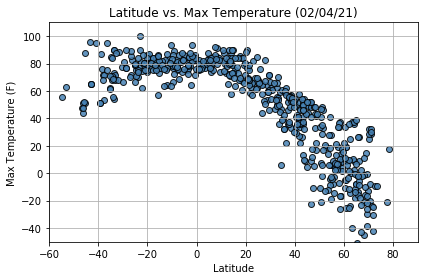

In [46]:
# plot the data and save as png

x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('Latitude vs. Max Temperature (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-50,110)
plt.xlim(-60,90)
plt.tight_layout()
plt.savefig("Output_Data/Latitude vs. Max Temperature.png")
plt.show()

There is a strong association between max temperatures along latitude coordinates moving from the North to the South of the equator. The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The southern hemisphere tends to be warmer this time of the year than the northern hemisphere.

## Latitude vs. Humidity Plot

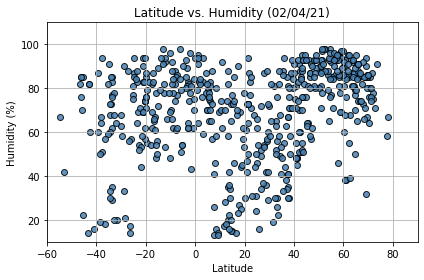

In [47]:
# plot the data and save as png

x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('Latitude vs. Humidity (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(10,110)
plt.xlim(-60,90)
plt.tight_layout()
plt.savefig("Output_Data/Latitude vs. Humidity.png")
plt.show()

There is a weak association between humidity levels and latitude coordinates, though it appears the humidity levels in the northern hemisphere (between 40 and 70 Deg. Latitude) tends to be above 80% during this time of the year.

## Latitude vs. Cloudiness Plot

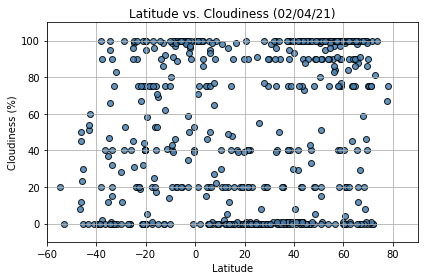

In [48]:
# plot the data and save as png

x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('Latitude vs. Cloudiness (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-10,110)
plt.xlim(-60,90)
plt.tight_layout()
plt.savefig("Output_Data/Latitude vs. Cloudiness.png")
plt.show()

There is no correlation between cloudiness levels and latitude coordinates during this time of the year.

## Latitude vs. Wind Speed Plot

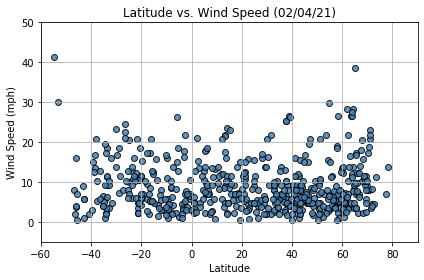

In [49]:
# plot the data and save as png

x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('Latitude vs. Wind Speed (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-5, 50)
plt.xlim(-60,90)
plt.tight_layout()
plt.savefig("Output_Data/Latitude vs. Wind Speed.png")
plt.show()

There is no correlation between wind speed and latitude coordinates, though wind speeds above 20mph tends to be less common and wind speeds above 30mph tends to be very infrequent during this time of the year.

## Linear Regression

In [50]:
# seperate northern and southern hemispheres using LOC

northern_hemisphere = clean_city_data.loc[city_df['Lat'] >= 0]
southern_hemisphere = clean_city_data.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8862429995818722.


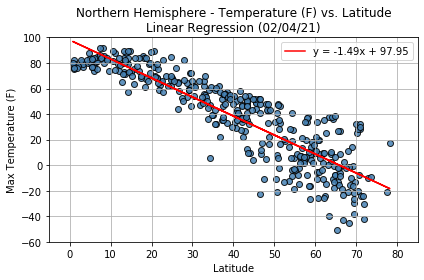

In [51]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-60,100)
plt.xlim(-5,85)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/NH - Max Temp vs Latitude")
plt.show()

This plot shows a strong negative linear association between decreasing temperature values along Latitude coordinates in the Northern hemisphere. The correlation coefficient for these two variables is R=-0.8862, which supports the above statement.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4330016568898475.


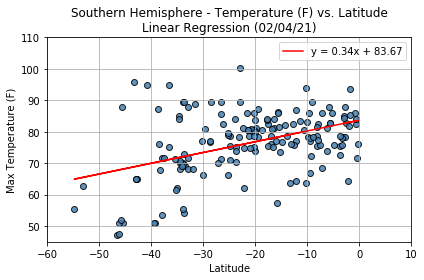

In [52]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(45,110)
plt.xlim(-60,10)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/SH - Max Temp vs Latitude")
plt.show()

This plot shows a somewhat moderate or weak positive linear association between increasing temperature values along Latitude coordinates in the Southern hemisphere. The correlation coefficient for these two variables is R=0.4330, which could possibly mean there is a somewhat moderate or weak linear association between the 2 variables association.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42587727745776455.


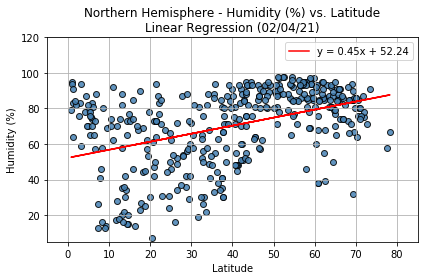

In [53]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(5,120)
plt.xlim(-5,85)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/NH - Humidity vs Latitude")
plt.show()

This plot shows a moderate or weak association between increasing humidity values along Latitude coordinates in the Northern hemisphere. The correlation coefficient for these two variables is R=0.4258, which could likely mean there is a somewhat moderate or perhaps very weak positive linear association.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3092101473017418.


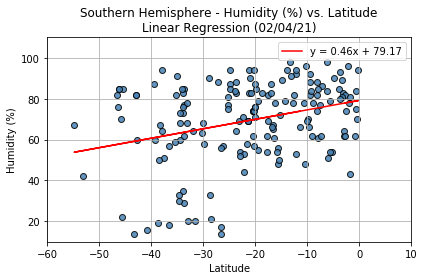

In [54]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(10,110)
plt.xlim(-60,10)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/SH - Humidity vs Latitude")
plt.show()

This plot shows a very weak association between increasing humidity values along Latitude coordinates in the Southern hemisphere. The correlation coefficient for these two variables is R=0.3092, which could likely mean there is no linear association between the 2 variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29308390665974554.


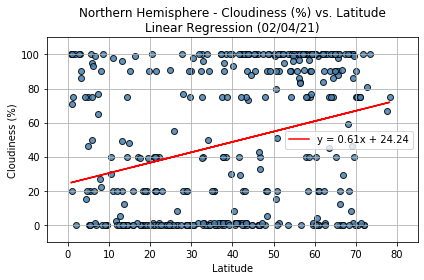

In [55]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-10,110)
plt.xlim(-5,85)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/NH - Cloudiness vs Latitude")
plt.show()

This plot shows no association between increasing cloudiness values along Latitude coordinates in the Northern hemisphere. The correlation coefficient for these two variables is R=0.2930, which likely means there is no linear association between the 2 variables.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.41657215803700404.


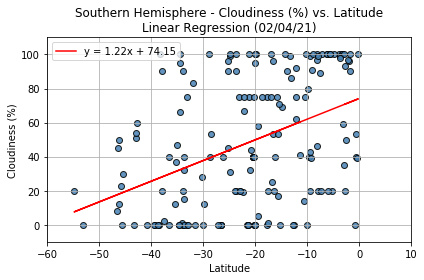

In [56]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-10,110)
plt.xlim(-60,10)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/SH - Cloudiness vs Latitude")
plt.show()

This plot shows a weak association between increasing cloudiness values along Latitude coordinates in the Southern hemisphere. The correlation coefficient for these two variables is R=0.4165, which could likely mean there is a weak positive linear association or no association at all between the 2 variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05461746046935072.


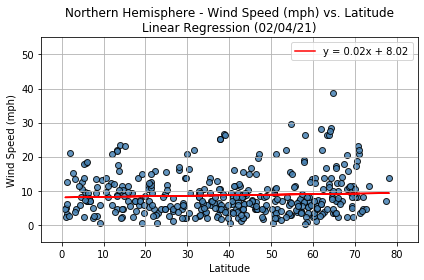

In [57]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-5,55)
plt.xlim(-5,85)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/NH - Wind Speed vs Latitude")
plt.show()

This plot shows no linear association between increasing wind speed values along Latitude coordinates in the Northern hemisphere. The correlation coefficient for these two variables is R=0.0546, which supports the above statement that there is likely no association between the 2 variables.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19564206208766538.


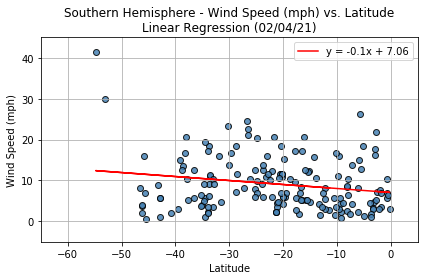

In [58]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}.")

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.plot(x_values,regress_values,"r-", label = line_eq)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude\nLinear Regression (02/04/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-5,45)
plt.xlim(-65,5)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("Output_Data/SH - Wind Speed vs Latitude")
plt.show()

This plot shows a very weak negative association between increasing wind speed values along Latitude coordinates in the Southern hemisphere. The correlation coefficient for these two variables is R=-0.1956, which supports the above statement that though it looks like there is a weak negative trend, there is likely no association between the 2 variables.